In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Loading the data
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Superstore Sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
#Number of rows and columns
df.shape

(51290, 21)

In [5]:
#Looking for missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
#Looking for duplicated values
df.duplicated().sum()

0

In [7]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
#Description of the data
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


In [9]:
#Groups products with same name and sorts in descending order based on total quantity sold
bought=df.groupby('product_name').agg({'quantity':'sum'}).sort_values('quantity',ascending=False)[:10]
bought

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


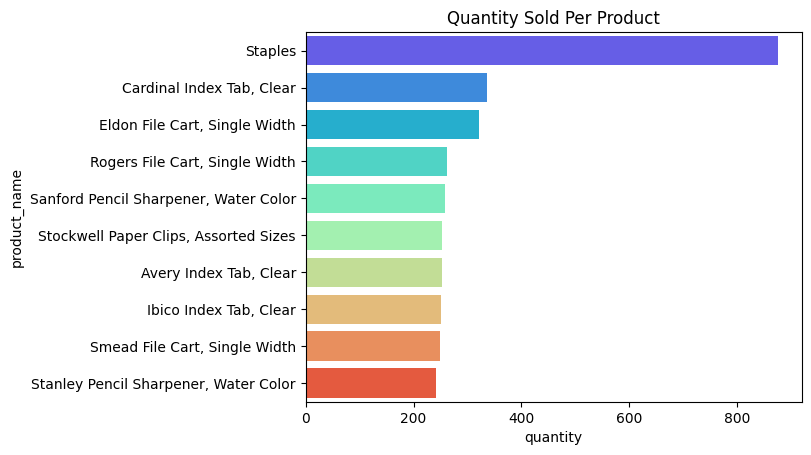

In [10]:
sns.barplot(x="quantity", y="product_name", hue="product_name", data=bought, palette='rainbow', legend=False)
plt.title("Quantity Sold Per Product")
plt.show()

In [11]:
#Groups products with same name and sorts in descending order based on total sale
sales=df.groupby('product_name').agg({'sales':'sum'}).sort_values('sales',ascending=False)[:10]
sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Apple Smart Phone, Full Size'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Nokia Smart Phone, Full Size'),
  Text(4, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(5, 0, 'Hon Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Office Star Executive Leather Armchair, Adjustable'),
  Text(7, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(8, 0, 'Samsung Smart Phone, Cordless'),
  Text(9, 0, 'Nokia Smart Phone, with Caller ID')])

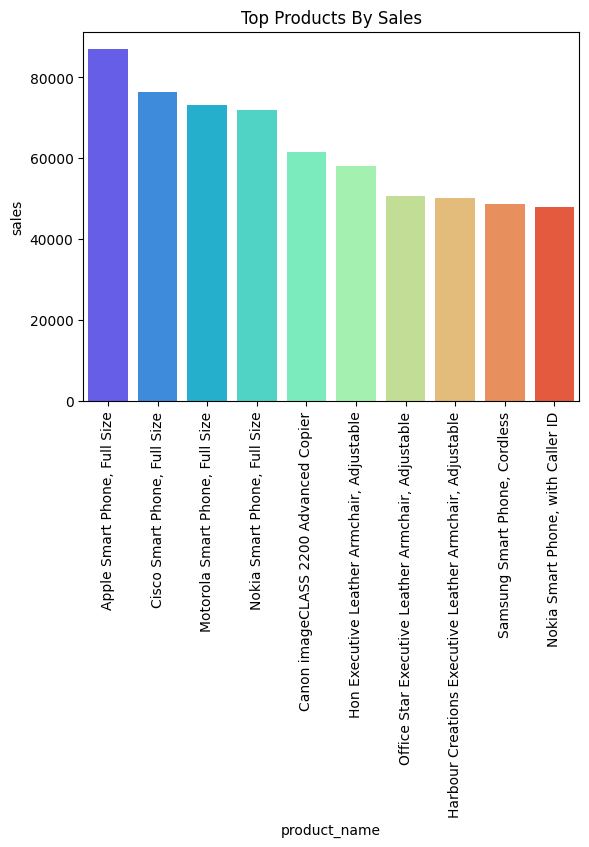

In [12]:
sns.barplot(x="product_name", y="sales", hue="product_name", data=sales, palette='rainbow', legend=False)
plt.title("Top Products By Sales")
plt.xticks(rotation = 'vertical')

In [13]:
#Groups products with same name and sorts in descending order based on total profit
profit=df.groupby('product_name').agg({'profit':'sum'}).sort_values('profit',ascending=False)[:10]
profit

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


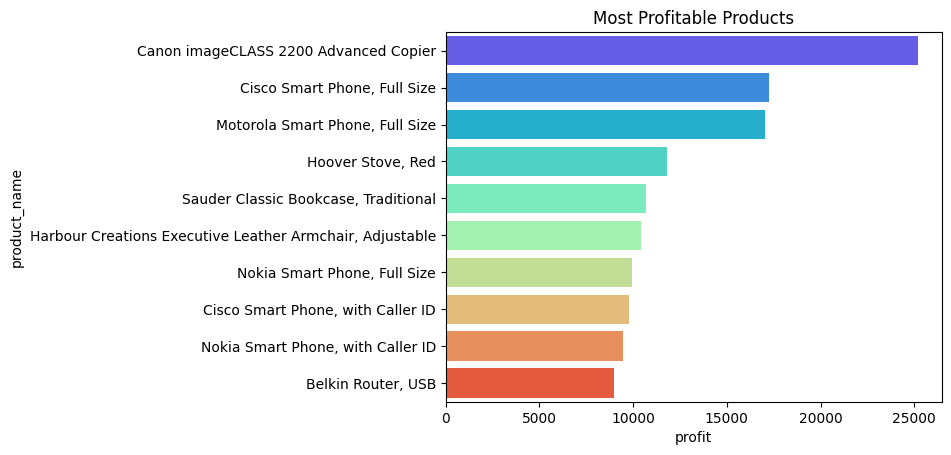

In [14]:
sns.barplot(x="profit", y="product_name", hue="product_name", data=profit, palette='rainbow', legend=False)
plt.title("Most Profitable Products")
plt.show()

In [15]:
#Groups products of same category and totals the sales
df.groupby(['category', 'sales']).sum(numeric_only=True)

quantity  discount     profit  shipping_cost  year
category   sales                                                        
Furniture  1.892             1       0.6    -0.9933        0.18000  2014
           1.988             1       0.6    -1.4413        0.17000  2014
           2.032             1       0.6    -1.3208        0.10000  2014
           2.328             4       1.2    -1.5132        0.38000  4026
           2.784             2       0.2     0.4176        0.14000  2014
...                        ...       ...        ...            ...   ...
Technology 10499.970         3       0.0  5039.9856      363.19000  2014
           11199.968         4       0.2  3919.9888       45.98000  2014
           13999.960         4       0.0  6719.9808       20.00054  2014
           17499.950         5       0.0  8399.9760      349.07000  2013
           22638.480         6       0.5 -1811.0784       24.28650  2011

[29131 rows x 5 columns]

In [16]:
#Most profitable category
profit_category=df.groupby('category').agg({'profit':'sum'}).sort_values('profit',ascending=False)[:10]
profit_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


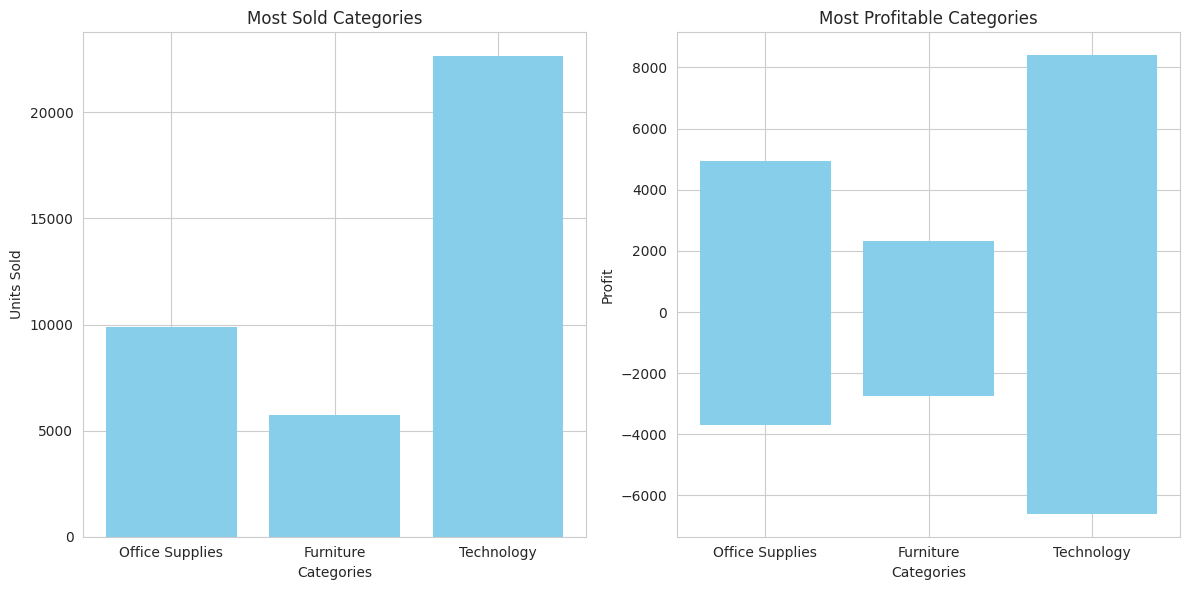

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(df['category'], df['sales'], color='skyblue', edgecolor='none')
plt.xlabel('Categories')
plt.ylabel('Units Sold')
plt.title('Most Sold Categories')

plt.subplot(1, 2, 2)
plt.bar(df['category'], df['profit'], color='skyblue', edgecolor='none')
plt.xlabel('Categories')
plt.ylabel('Profit')
plt.title('Most Profitable Categories')

plt.tight_layout()
plt.show()

In [17]:
#Total sales values by category and subcategory
df.groupby(['category','sub_category']).sum(numeric_only=True)

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06      8310   370.710  161924.41950   
                Chairs        1.501682e+06     12336   560.120  141973.79750   
                Furnishings   3.855783e+05     11225   478.880   46967.42550   
                Tables        7.570419e+05      3083   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06      6078   248.700  141680.58940   
                Art           3.720920e+05     16301   573.080   57953.91090   
                Binders       4.619115e+05     21429  1102.480   72449.84600   
                Envelopes     1.709043e+05      8380   320.810   29601.11630   
                Fasteners     8.324232e+04      8390   340.240   11525.42410   
                Labels        7.340403e+04      9322   313.890   15010.51200   
                Paper         2.442917e+05     12822   387.300   59207.68270   
                Storage       1.127086e+06     16917   700.490  108461.48980   
                Supplies      2.430742e+05      8543   310.200   22583.26310   
Technology      Accessories   7.492370e+05     10946   370.480  129626.30620   
                Copiers       1.509436e+06      7454   260.418  258567.54818   
                Machines      7.790601e+05      4906   252.000   58867.87300   
                Phones        1.706824e+06     11870   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

In [18]:
#Most sold products in subcategory
df.groupby(["category", "sub_category"], as_index=False)["quantity"].count()

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


In [19]:
#Most profitable customer segment
profit_segment=df.groupby('segment').agg({'profit':'sum'}).sort_values('profit',ascending=False)[:10]
profit_segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

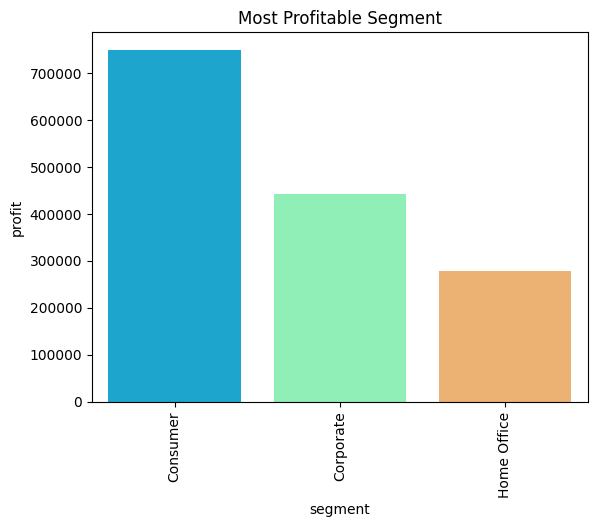

In [20]:
sns.barplot(x="segment", y="profit", hue="segment", data=profit_segment, palette='rainbow', legend=False)
plt.title("Most Profitable Segment")
plt.xticks(rotation = 'vertical')

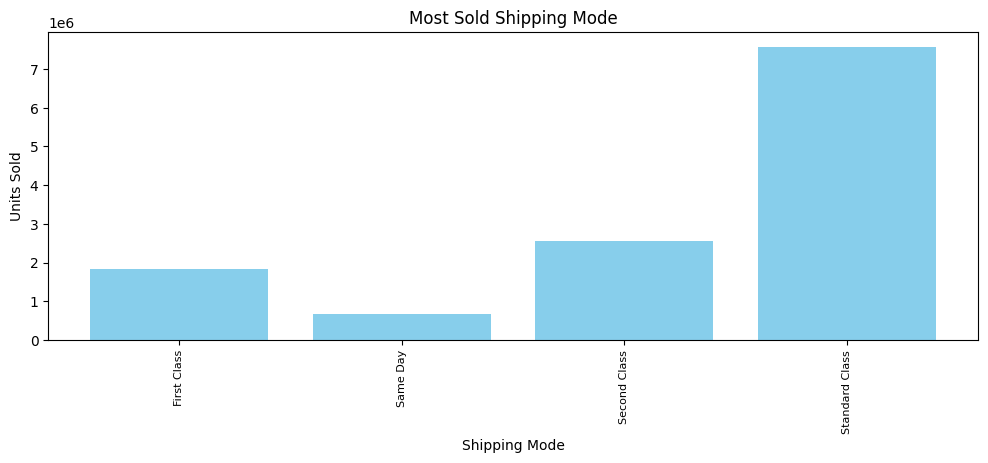

In [21]:
aggregated_df = df.groupby('ship_mode')[['sales']].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.bar(aggregated_df['ship_mode'], aggregated_df['sales'], color='skyblue')
plt.xlabel('Shipping Mode')
plt.ylabel('Units Sold')
plt.title('Most Sold Shipping Mode')
plt.xticks(rotation='vertical', size=8)
plt.show()

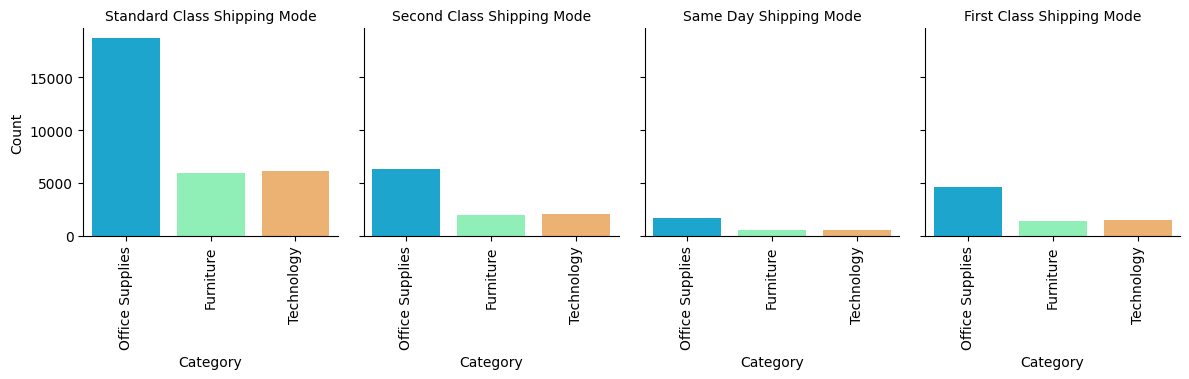

In [22]:
#FacetGrid for count plots by ship_mode
category_hist = sns.FacetGrid(df, col='ship_mode', despine=True)
category_hist.map_dataframe(sns.countplot, x='category', hue='category', palette='rainbow', legend=False)
category_hist.set_axis_labels("Category", "Count")
category_hist.set_titles("{col_name} Shipping Mode")

#Rotate x-axis labels and remove grid
for ax in category_hist.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    ax.grid(False)

plt.show()

<ipython-input-23-68716ce81b3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market',data=df, palette='rainbow')


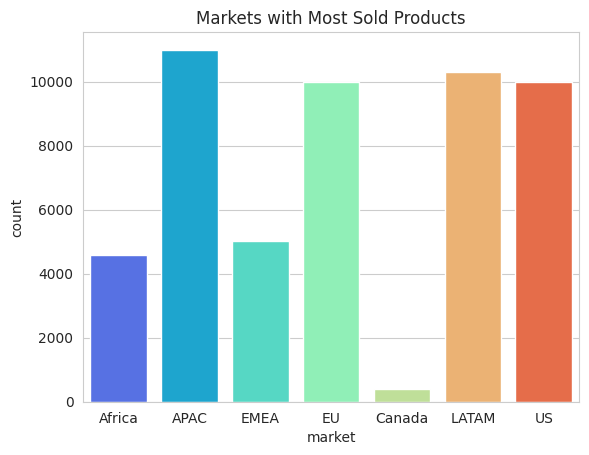

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=df, palette='rainbow')
plt.title('Markets with Most Sold Products')
plt.show()

In [24]:
countries=df.groupby('country').agg({'sales':'sum'}).sort_values('sales',ascending=False)[:10]
countries

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


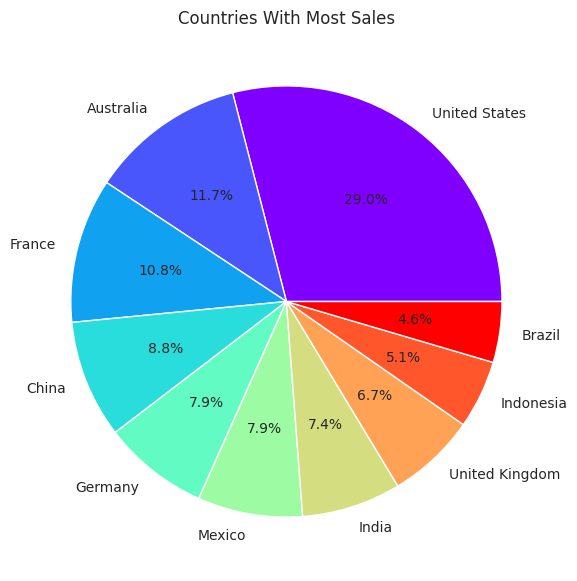

In [25]:
countries = countries.sort_values(by='sales', ascending=False)[:10]

colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))

countries['sales'].plot(kind='pie', autopct='%1.1f%%', figsize=(14, 7), colors=colors)
plt.title('Countries With Most Sales')
plt.ylabel('')
plt.show()

In [26]:
#Average shipping cost of top sold countries
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost',ascending=False)[:10]

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


In [27]:
#Most Profitable Customers
df.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]

,order_id,customer_name,profit
29530,CA-2013-118689,Tamara Chand,8399.9760
36239,CA-2014-140151,Raymond Buch,6719.9808
48097,CA-2014-166709,Hunter Lopez,5039.9856
33011,CA-2013-117121,Adrian Barton,4946.3700
5522,CA-2011-116904,Sanjit Chand,4630.4755
43831,ES-2014-1651774,Patrick Jones,3979.0800
46525,CA-2014-127180,Tom Ashbrook,3919.9888
10265,CA-2012-145352,Christopher Martinez,3177.4750
548,ID-2011-64599,Carol Adams,2939.3100
24420,IN-2013-50809,Cynthia Arntzen,2817.9900


In [28]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1


In [29]:
#Total sale each year and month
date = df.groupby(['year','month']).sum(numeric_only=True)
date

sales  quantity  discount       profit  shipping_cost
year month                                                              
2011 1       98898.48886      1463    68.758   8321.80096    10544.78800
     2       91152.15698      1224    52.252  12417.90698    10681.16300
     3      145729.36736      1836    74.212  15303.56826    13096.18550
     4      116915.76418      2020    80.782  12902.32438    12954.52000
     5      146747.83610      2013    82.382  12183.82870    16443.20600
     6      215207.38022      3112   159.534  23415.24702    23813.10900
     7      115510.41912      1774    80.086   5585.00352    11844.47600
     8      207581.49122      3035   121.462  23713.66772    22001.13600
     9      290214.45534      3707   137.678  35776.88394    29664.85100
     10     199071.26404      2727   110.192  25963.41834    21380.08200
     11     298496.53752      4039   178.836  32709.17772    34701.99800
     12     333925.73460      4493   187.220  40647.98400    37144.83100
2012 1      135780.72024      1845    74.454  10401.63764    13665.74900
     2      100510.21698      1473    62.784  15000.09618    11393.72600
     3      163076.77116      2237   101.682  17992.91756    16170.78500
     4      161052.26952      2250    93.248  17366.96722    16767.86200
     5      208364.89124      2921   114.272  29876.70374    23801.61700
     6      256175.69842      3671   168.284  34407.15362    28155.90000
     7      145236.78512      2321   104.404  15585.38842    17334.43500
     8      303142.94238      3818   136.166  43573.87858    32038.73000
     9      289389.16564      4205   169.070  27776.18034    28023.17800
     10     252939.85020      3563   135.866  30662.88270    25085.74000
     11     323512.41690      5193   215.868  31820.72180    33489.74100
     12     338256.96660      4614   172.676  32950.75130    37563.36100
2013 1      199185.90738      2413    91.442  26810.55968    21677.43200
     2      167239.65040      2102    78.012  25340.02610    16911.85000
     3      198594.03012      2686   114.384  23433.77462    21268.01000
     4      177821.31684      2688   116.116  19462.03844    19133.23400
     5      260498.56470      3808   153.092  28495.69410    28315.21100
     6      396519.61190      5327   213.642  45478.41340    42814.02600
     7      229928.95200      3252   125.644  28863.82720    24501.84236
     8      326488.78936      4934   202.640  31023.66846    35673.08800
     9      376619.24568      5793   240.674  38905.66778    38488.40000
     10     293406.64288      3883   160.860  42433.22258    31174.68400
     11     373989.36010      5556   215.324  48062.99670    41407.16700
     12     405454.37802      5694   223.692  50202.87112    43183.80000
2014 1      241268.55566      3122   127.928  28001.38626    24870.80100
     2      184837.35556      2482   111.126  19751.69996    19525.80000
     3      263100.77262      3722   142.016  37357.26052    26838.63554
     4      242771.86130      3594   164.000  23782.30120    26272.71800
     5      288401.04614      4300   188.986  33953.55774    31882.58300
     6      401814.06310      6009   251.462  43778.60280    41894.07600
     7      258705.68048      3637   163.512  28035.87258    29581.73300
     8      456619.94236      5824   217.672  53542.89496    46759.35300
     9      481157.24370      6837   272.094  67979.45110    53485.43000
     10     422766.62916      5876   233.752  58209.83476    44622.41400
     11     555279.02700      7706   304.384  62856.58790    59918.35500
     12     503143.69348      7513   335.106  46916.52068    54853.89100

<ipython-input-30-dd834253a2cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='sales', data=date.reset_index(), palette='rainbow', legend=False)


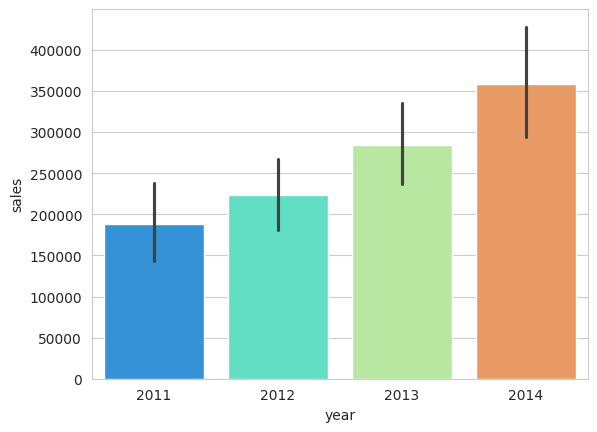

In [30]:
#Total Sales per Year
sns.barplot(x='year', y='sales', data=date.reset_index(), palette='rainbow', legend=False)
plt.show()